# Inteligencia de Negocios
# Trabajo práctico 4 - Minería de datos

- Professor: Lorena Zuñiga

- Students:  
    - María Mora Cross, Instituto Tecnológico de Costa Rica.
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 

- March 03th, 2020

## **1-) Instalación de arules y arulesViz**

In [1]:
# Install necessary libraries
install.packages("arules")
install.packages("arulesViz")
install.packages("skimr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘gdata’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **2-) Importar bibliotecas necesarias para la ejecución de la TP4**

In [2]:
library(arules)
library(arulesViz)
library(tidyverse)
library(plyr)
library(ggplot2)
library(knitr)
library(lubridate)
library(RColorBrewer)
library(skimr)
library(dplyr)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid

Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::recode() masks arules::recode()
✖ tidyr::unpack() masks Matrix::unpack()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both

# **3-) Entendimiento del negocio**

**Objetivo de negocio:**

Descubrir características que podrían llevar a una persona a ganar tener ingresos superiores a $50mil

**Objetivo de minería de datos:**

Descubrir reglas de interés que permitan asociar características con el hecho de ganar más de $50mil.

**Criterio de éxito:**
*   Lograr reglas con una confianza mayor al 85%.



# **4-) Entendimiento de los datos**

**4.1   Recolección de datos iniciales.**







In [7]:
# CSV File Path
CSV_FILE_PATH<- 'https://raw.githubusercontent.com/fmejias/CienciasDeLosDatosTEC/master/InteligenciaNegocios/TP4/AdultosUSA.csv'

# This function is in charge of reading a CSV file and create a DataFrame
load_csv_file_to_dataframe <- function(csv_file_path) {
  data_frame<- read.csv(CSV_FILE_PATH,sep=';',dec=',',stringsAsFactors = TRUE)
  return(data_frame)
}

# This function is in charge of showing the complete DataFrame table
show_dataframe_information <- function(data_frame) {
  # Show complete DataFrame
  cat("- Los datos de las primeras 20 filas del data frame son: \n\n")
  ##data_frame
  head(data_frame, n = 20)
}

# Load CSV file to create a DataFrame with USA Adults Info
usa_adults_data_frame<- load_csv_file_to_dataframe(CSV_FILE_PATH)

# Show USA Adults DataFrame
cat("A continuación se va a mostrar el DataFrame de Adultos de USA:", "\n\n")
show_dataframe_information(usa_adults_data_frame)

A continuación se va a mostrar el DataFrame de Adultos de USA: 

- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,EstadoCivil,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,United-States,<=50K.
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K.
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,United-States,<=50K.
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K.
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K.
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Female,40,United-States,<=50K.
7,49,Private,9th,5,Married-spouse-absent,Other-service,Female,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Male,45,United-States,>50K.
9,31,Private,Masters,14,Never-married,Prof-specialty,Female,50,United-States,>50K.


**4.2   Exploración de los datos.**







In [8]:
# This function is in charge of showing a summary of the DataFrame
show_dataframe_summary <- function(data_frame) {
  cat("\n- Un resumen con datos estadísticos del data frame es: \n\n")
  skim(data_frame)
}

# Show USA Adults DataFrame
cat("A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA:", "\n\n")
show_dataframe_summary(usa_adults_data_frame)

#Show max/min of numeric
cat("Valores máximos y mínimos de los datos numéricos del DataFrame de Adultos de USA:", "\n\n")

cat("HorasSemanales", "\n")
cat("Min: ",min(usa_adults_data_frame$HorasSemanales), "\n" )
cat("Max: ", max(usa_adults_data_frame$HorasSemanales), "\n\n")

cat("Edad",  "\n")
cat("Min: ", min(usa_adults_data_frame$Edad), "\n")
cat("Max: ", max(usa_adults_data_frame$Edad), "\n\n")

cat("AnnosEducacion", "\n")
cat("Min: ", min(usa_adults_data_frame$AnnosEducacion), "\n")
cat("Max: ", max(usa_adults_data_frame$AnnosEducacion), "\n")



A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA: 


- Un resumen con datos estadísticos del data frame es: 

── Data Summary ────────────────────────
                           Values    
Name                       data_frame
Number of rows             25000     
Number of columns          10        
_______________________              
Column type frequency:               
  factor                   7         
  numeric                  3         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate ordered n_unique
1 TipoTrabajo            0             1 FALSE          9
2 NivelEducativo         0             1 FALSE         16
3 EstadoCivil            0             1 FALSE          7
4 Ocupacion              0             1 FALSE         15
5 Sexo                   0             1 FA

**4.3   Verificación de la calidad de los datos**







Luego de analizar las estadísticas de los datos, se observa que no aparecen datos incompletos. Sin embargo, hay columnas que tienen como valor el signo de interrogación **?**, por lo que estas filas se consideran que tienen datos faltantes y por tanto se debe aplicar una limpieza sobre estas.

# **5-) Preparación de los datos**

**5.1   Selección de los datos**







In [9]:
# Marital status is ruled out, because it is considered irrelevant for the exercise.
# The rest of the columns will be used in the exercise.

rule_out_a_column <- function(data_frame)
  data_frame = subset(data_frame, select = -c(EstadoCivil) )
  return() 


# Rule out marital status
usa_adults_data_frame <- rule_out_a_column(usa_adults_data_frame)

# Show DataFrame without missing data rows
show_dataframe_information(usa_adults_data_frame)

NULL

- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K.
2,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,13,United-States,<=50K.
3,38,Private,HS-grad,9,Handlers-cleaners,Male,40,United-States,<=50K.
4,53,Private,11th,7,Handlers-cleaners,Male,40,United-States,<=50K.
5,28,Private,Bachelors,13,Prof-specialty,Female,40,Cuba,<=50K.
6,37,Private,Masters,14,Exec-managerial,Female,40,United-States,<=50K.
7,49,Private,9th,5,Other-service,Female,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,45,United-States,>50K.
9,31,Private,Masters,14,Prof-specialty,Female,50,United-States,>50K.


**5.2   Limpieza de los datos**







In [10]:
# Rows with missing data are deleted
delete_rows_with_missing_data <- function(data_frame) {
  data_frame[data_frame=="?"] <- NA
  data_frame <- na.omit(data_frame)
  return(data_frame)
}

# Remove rows with missing data
usa_adults_data_frame <- delete_rows_with_missing_data(usa_adults_data_frame)

# Show DataFrame without missing data rows
show_dataframe_information(usa_adults_data_frame)

# Show USA Adults DataFrame
cat("A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA:", "\n\n")
show_dataframe_summary(usa_adults_data_frame)


- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>
1,39,State-gov,Bachelors,13,Adm-clerical,Male,40,United-States,<=50K.
2,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,13,United-States,<=50K.
3,38,Private,HS-grad,9,Handlers-cleaners,Male,40,United-States,<=50K.
4,53,Private,11th,7,Handlers-cleaners,Male,40,United-States,<=50K.
5,28,Private,Bachelors,13,Prof-specialty,Female,40,Cuba,<=50K.
6,37,Private,Masters,14,Exec-managerial,Female,40,United-States,<=50K.
7,49,Private,9th,5,Other-service,Female,16,Jamaica,<=50K.
8,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,Male,45,United-States,>50K.
9,31,Private,Masters,14,Prof-specialty,Female,50,United-States,>50K.


A continuación se va a mostrar información estadística importante sobre el DataFrame de Adultos de USA: 


- Un resumen con datos estadísticos del data frame es: 

── Data Summary ────────────────────────
                           Values    
Name                       data_frame
Number of rows             23171     
Number of columns          9         
_______________________              
Column type frequency:               
  factor                   6         
  numeric                  3         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate ordered n_unique
1 TipoTrabajo            0             1 FALSE          7
2 NivelEducativo         0             1 FALSE         16
3 Ocupacion              0             1 FALSE         14
4 Sexo                   0             1 FALSE          2
5 PaisOrigen             0             1 FA

**5.3   Construcción de nuevos datos**







In [11]:
#Transform numeric data to ranges
transform_numeric_column_to_range <- function(data_frame){
  data_frame <- data_frame %>% mutate(Edad = case_when(Edad >= 61  ~ '61 or more',
                                    Edad >= 45  & Edad <= 60 ~ '45-60',
                                    Edad >= 30  & Edad <= 44 ~ '30-44',
                                    Edad >= 15  & Edad <= 29 ~ '15-29'))

  data_frame <- data_frame %>% mutate(HorasSemanales = case_when(HorasSemanales >= 81  ~ '81 or more',
                                    HorasSemanales >= 61  & HorasSemanales <= 80 ~ '61-80',
                                    HorasSemanales >= 41  & HorasSemanales <= 60 ~ '41-60',
                                    HorasSemanales >= 21  & HorasSemanales <= 40 ~ '21-40',
                                    HorasSemanales >= 1  & HorasSemanales <= 20 ~ '1-20'))   

  data_frame <- data_frame %>% mutate(AnnosEducacion = case_when(
                                    AnnosEducacion >= 11    ~ '11 or more',
                                    AnnosEducacion >= 6  & AnnosEducacion <= 10 ~ '6-10',
                                    AnnosEducacion >= 1  & AnnosEducacion <= 5 ~ '1-5'))      
                                     
                                    
  return(data_frame)                                  
}

# Transform numeric columns to ranges (Edad, HorasSemanales and AnnosEducacion)
usa_adults_data_frame <- transform_numeric_column_to_range(usa_adults_data_frame)

# Show DataFrame without missing data rows
show_dataframe_information(usa_adults_data_frame)

- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>,<chr>,<fct>,<fct>
1,30-44,State-gov,Bachelors,11 or more,Adm-clerical,Male,21-40,United-States,<=50K.
2,45-60,Self-emp-not-inc,Bachelors,11 or more,Exec-managerial,Male,1-20,United-States,<=50K.
3,30-44,Private,HS-grad,6-10,Handlers-cleaners,Male,21-40,United-States,<=50K.
4,45-60,Private,11th,6-10,Handlers-cleaners,Male,21-40,United-States,<=50K.
5,15-29,Private,Bachelors,11 or more,Prof-specialty,Female,21-40,Cuba,<=50K.
6,30-44,Private,Masters,11 or more,Exec-managerial,Female,21-40,United-States,<=50K.
7,45-60,Private,9th,1-5,Other-service,Female,1-20,Jamaica,<=50K.
8,45-60,Self-emp-not-inc,HS-grad,6-10,Exec-managerial,Male,41-60,United-States,>50K.
9,30-44,Private,Masters,11 or more,Prof-specialty,Female,41-60,United-States,>50K.


**5.4   Transformaciones aplicadas a los datos**







In [12]:
# Transform numeric data to factor
transform_numeric_column_to_factor_column <- function(data_frame) {
  data_frame$Edad<- as.factor(data_frame$Edad)
  data_frame$HorasSemanales<- as.factor(data_frame$HorasSemanales)
  data_frame$AnnosEducacion<- as.factor(data_frame$AnnosEducacion)
  return(data_frame)
}

# Transform dataframe to transaction format
transform_dataframe_to_transaction_format <- function(data_frame) {
  transaction_format_dataframe<- as(data_frame, "transactions")
  return(transaction_format_dataframe)
}

# Transform Edad, HorasSemanales and AnnosEducacion columns
usa_adults_data_frame<- transform_numeric_column_to_factor_column(usa_adults_data_frame)

# Show DataFrame with numeric data as factors
show_dataframe_information(usa_adults_data_frame)

# Transform DataFrame to Transaction Format
usa_adults_data_frame_transaction_format<- transform_dataframe_to_transaction_format(usa_adults_data_frame)

# Show DataFrame as TransactionFormat
cat("\n\nSummary of Transaction Format DataFrame: \n\n")
summary(usa_adults_data_frame_transaction_format)


- Los datos de las primeras 20 filas del data frame son: 



,Edad,TipoTrabajo,NivelEducativo,AnnosEducacion,Ocupacion,Sexo,HorasSemanales,PaisOrigen,Ingresos
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,30-44,State-gov,Bachelors,11 or more,Adm-clerical,Male,21-40,United-States,<=50K.
2,45-60,Self-emp-not-inc,Bachelors,11 or more,Exec-managerial,Male,1-20,United-States,<=50K.
3,30-44,Private,HS-grad,6-10,Handlers-cleaners,Male,21-40,United-States,<=50K.
4,45-60,Private,11th,6-10,Handlers-cleaners,Male,21-40,United-States,<=50K.
5,15-29,Private,Bachelors,11 or more,Prof-specialty,Female,21-40,Cuba,<=50K.
6,30-44,Private,Masters,11 or more,Exec-managerial,Female,21-40,United-States,<=50K.
7,45-60,Private,9th,1-5,Other-service,Female,1-20,Jamaica,<=50K.
8,45-60,Self-emp-not-inc,HS-grad,6-10,Exec-managerial,Male,41-60,United-States,>50K.
9,30-44,Private,Masters,11 or more,Prof-specialty,Female,41-60,United-States,>50K.




Summary of Transaction Format DataFrame: 



transactions as itemMatrix in sparse format with
 23171 rows (elements/itemsets/transactions) and
 98 columns (items) and a density of 0.09183673 

most frequent items:
PaisOrigen=United-States          Ingresos=<=50K.      TipoTrabajo=Private 
                   21155                    17441                    17069 
               Sexo=Male      AnnosEducacion=6-10                  (Other) 
                   15632                    14479                   122763 

element (itemset/transaction) length distribution:
sizes
    9 
23171 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      9       9       9       9       9       9 

includes extended item information - examples:
      labels variables levels
1 Edad=15-29      Edad  15-29
2 Edad=30-44      Edad  30-44
3 Edad=45-60      Edad  45-60

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

# **6-) Fase de modelado**

**6.1   Selección de técnicas**







Se plantea utilizar el Algoritmo A priori para descubrir reglas de interés que permitan a partir de los datos asociar características con el hecho de ganar más de $50mil.

**6.2   Construcción del modelo**







**6.2.1   Selección de los parámetros**







In [0]:
# Parameters values selection
SUPPORT<- 0.001
CONFIDENCE<- 0.85
MAXLEN<- 8 # This value represents the maximum number of items

**6.2.2   Ejecución**







In [14]:
# Rules generator
apriori_rules_generator <- function(data_frame_transaction_format) {
  rules<- apriori(data_frame_transaction_format,parameter = list(supp=SUPPORT,conf=CONFIDENCE,maxlen=MAXLEN),
                  appearance = list(default="lhs",rhs='Ingresos=>50K.'))
  return(rules)
}

# Generate rules
apriori_rules<- apriori_rules_generator(usa_adults_data_frame_transaction_format)

# Show rules summary
cat("\n\n\n- Show rules summary: \n\n")
summary(apriori_rules)

# Remove redundant rules
subsets<- which(colSums(is.subset(apriori_rules,apriori_rules))>1)
final_apriori_rules<- apriori_rules[-subsets]

# Show top 10 final rules
cat("\n\n- Show top 10 final rules: \n\n")
inspect(final_apriori_rules[1:10])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.85    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 23 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[94 item(s), 23171 transaction(s)] done [0.01s].
sorting and recoding items ... [76 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 7 8

Warning message in apriori(data_frame_transaction_format, parameter = list(supp = SUPPORT, :
“Mining stopped (maxlen reached). Only patterns up to a length of 8 returned!”


 done [0.07s].
writing ... [363 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].



- Show rules summary: 



set of 363 rules

rule length distribution (lhs + rhs):sizes
  3   4   5   6   7   8 
  2  22  79 132  97  31 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   5.000   6.000   6.083   7.000   8.000 

summary of quality measures:
    support           confidence          lift           count       
 Min.   :0.001036   Min.   :0.8500   Min.   :3.437   Min.   : 24.00  
 1st Qu.:0.001252   1st Qu.:0.8696   1st Qu.:3.516   1st Qu.: 29.00  
 Median :0.001856   Median :0.8916   Median :3.605   Median : 43.00  
 Mean   :0.002393   Mean   :0.9003   Mean   :3.641   Mean   : 55.44  
 3rd Qu.:0.003129   3rd Qu.:0.9259   3rd Qu.:3.744   3rd Qu.: 72.50  
 Max.   :0.009538   Max.   :1.0000   Max.   :4.044   Max.   :221.00  

mining info:
                          data ntransactions support confidence
 data_frame_transaction_format         23171   0.001       0.85



- Show top 10 final rules: 

     lhs                               rhs                  support confidence     lift count
[1]  {NivelEducativo=Doctorate,                                                              
      Ocupacion=Exec-managerial}    => {Ingresos=>50K.} 0.001683138  0.8863636 3.584281    39
[2]  {TipoTrabajo=Self-emp-inc,                                                              
      NivelEducativo=Prof-school}   => {Ingresos=>50K.} 0.002244185  0.9454545 3.823233    52
[3]  {Edad=45-60,                                                                            
      TipoTrabajo=State-gov,                                                                 
      NivelEducativo=Doctorate}     => {Ingresos=>50K.} 0.001381037  0.8888889 3.594493    32
[4]  {TipoTrabajo=State-gov,                                                                 
      NivelEducativo=Doctorate,                                                              
      HorasSemanales=41-60}  

**6.2.3   Descripción de los modelos obtenidos**







La descripción de los modelos obtenidos es la siguiente: 



- Show top 5 final rules: 

    lhs                               rhs                  support confidence     lift count
[1] {TipoTrabajo=Self-emp-inc,                                                              
     NivelEducativo=Prof-school}   => {Ingresos=>50K.} 0.002244185  0.9454545 3.823233    52
[2] {TipoTrabajo=Self-emp-not-inc,                                                          
     NivelEducativo=Prof-school,                                                            
     HorasSemanales=41-60}         => {Ingresos=>50K.} 0.002157870  0.9259259 3.744263    50
[3] {Edad=45-60,                                                                            
     TipoTrabajo=Self-emp-inc,                                                              
     Ocupacion=Prof-specialty,                                                              
     HorasSemanales=41-60}         => {Ingresos=>50K.} 0.001078935  0.9259

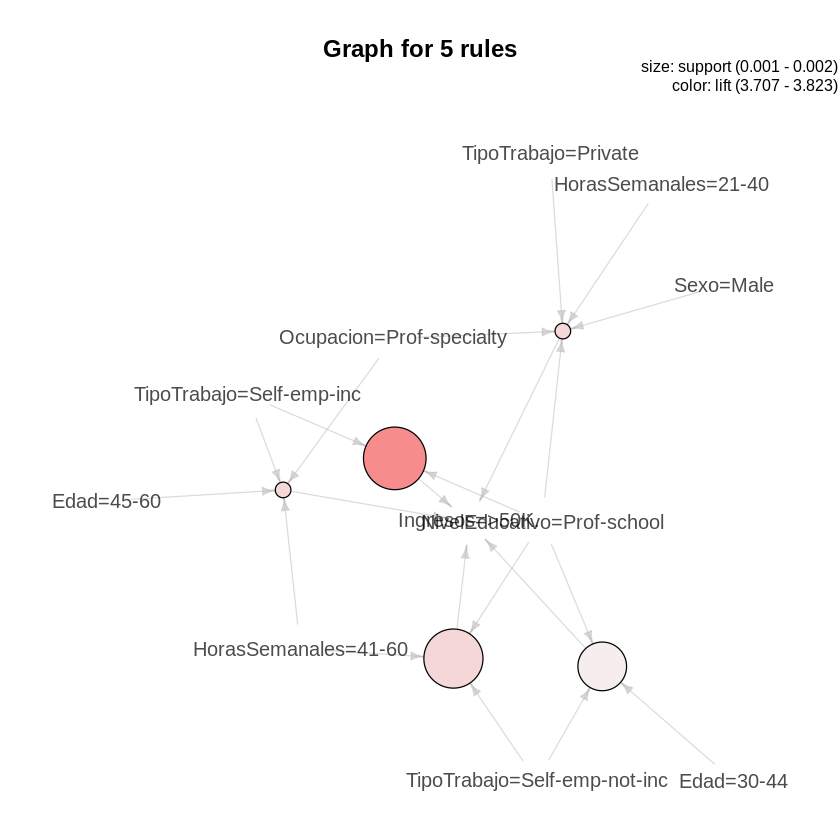

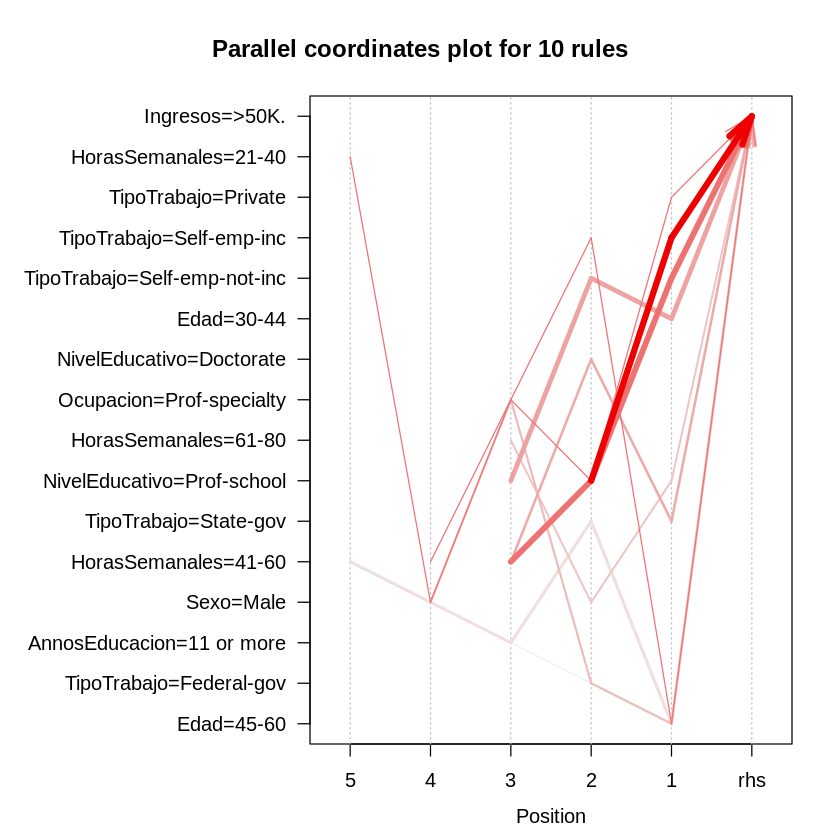

In [16]:
cat("La descripción de los modelos obtenidos es la siguiente: \n\n")

# Filter rules with superior confidence of 0.85
best_rules<- final_apriori_rules[quality(final_apriori_rules)$confidence>0.85]

# Select best five rules
best_five_rules<- head(best_rules, n=5, by='confidence')

# Plot best five rules  
plot(best_five_rules,method = 'graph')

# Show top 5 final rules
cat("\n\n- Show top 5 final rules: \n\n")
inspect(best_five_rules)

# Plot 10 individual rules
top_ten_rules<-head(best_rules,n=10,by='confidence')
plot(top_ten_rules,method ='paracoord')

**6.3   Evaluación de los modelos**









- Show top 3 final rules: 

    lhs                               rhs                  support confidence     lift count
[1] {TipoTrabajo=Self-emp-inc,                                                              
     NivelEducativo=Prof-school}   => {Ingresos=>50K.} 0.002244185  0.9454545 3.823233    52
[2] {TipoTrabajo=Self-emp-not-inc,                                                          
     NivelEducativo=Prof-school,                                                            
     HorasSemanales=41-60}         => {Ingresos=>50K.} 0.002157870  0.9259259 3.744263    50
[3] {Edad=45-60,                                                                            
     TipoTrabajo=Self-emp-inc,                                                              
     Ocupacion=Prof-specialty,                                                              
     HorasSemanales=41-60}         => {Ingresos=>50K.} 0.001078935  0.9259259 3.744263    25


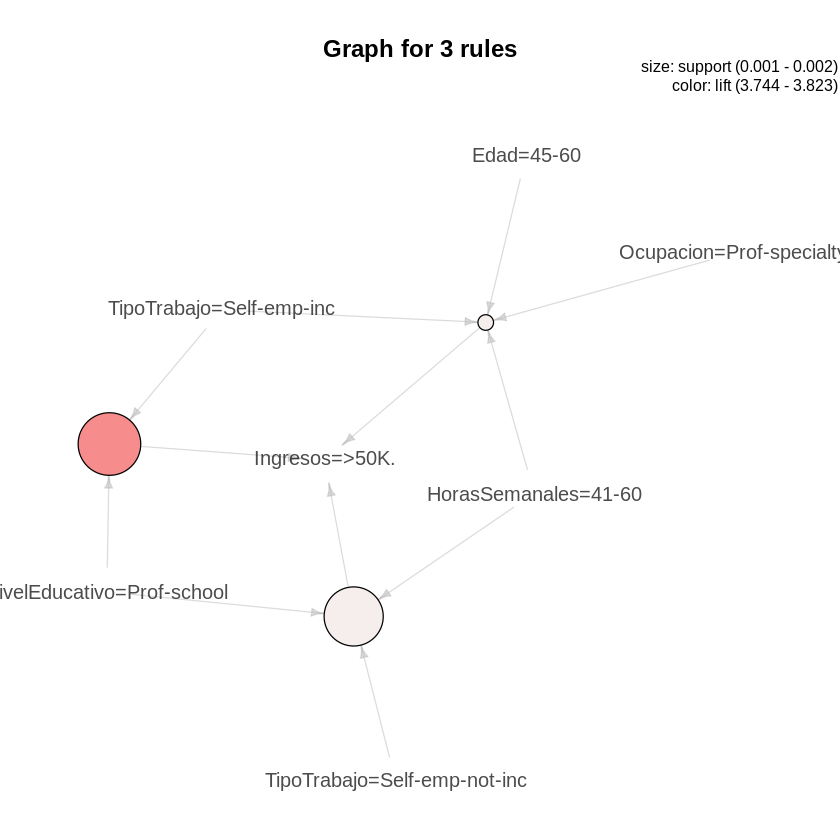

In [17]:
# Select best 3 rules
best_three_rules<- head(best_rules, n=3, by='confidence')

# Plot best 3 rules  
plot(best_three_rules,method = 'graph')

# Show top 3 final rules
cat("\n\n- Show top 3 final rules: \n\n")
inspect(best_three_rules)

El gráfico anterior muestra las tres mejores reglas generadas a partir del conjunto de datos. Se puede observar que los tipos de trabajo Self-emp-inc y Self-emp-not-inc están presente en las mejores reglas, además se puede observar que el nivel educativo Prof-school aparece en dos de las reglas y la regla que no lo tiene presenta una ocupación prefesional (Prof-specialty). Adicionalmente, dos de las regla presentan de 41-60 horas laboradas. Al parecer con estas reglas se favorece a los trabajadores profesionales independientes que trabajan de 41 a 60 horas semanales como muy probables que ganen más de $50 mil dólares al año. 